### Import

In [149]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import plotly.express as px

In [6]:
plt.style.use('seaborn')

### Task

In [7]:
# Load Data
dados = pd.read_csv('desafio1.csv', index_col = 'RowNumber')

# Group Data
group = dados[['estado_residencia','pontuacao_credito']].groupby('estado_residencia')['pontuacao_credito']

# Calculate statistics
ans = pd.DataFrame({
    'moda': group.mean(),
    'media': group.mean(),
    'desvio_padrao': group.std()
}, index = dados['estado_residencia'].unique())

# Answer to JSON
ans.transpose().to_json('submision_mat.json')

# Data Exploration

We can see thet there is no null value inside the dataset

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 1 to 7000
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        7000 non-null   object 
 1   sobrenome                 7000 non-null   object 
 2   pontuacao_credito         7000 non-null   int64  
 3   estado_residencia         7000 non-null   object 
 4   genero                    7000 non-null   object 
 5   idade                     7000 non-null   int64  
 6   nivel_estabilidade        7000 non-null   int64  
 7   saldo_conta               7000 non-null   float64
 8   numero_produtos           7000 non-null   int64  
 9   possui_cartao_de_credito  7000 non-null   int64  
 10  membro_ativo              7000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 656.2+ KB


Taking a quick look at the data:

In [14]:
dados.head()

,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
RowNumber,,,,,,,,,,,
1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
6996,3e607c788c09d6e1f99cc50575e471fee41a322a,ef547badb8b0801d06a93155cc052341c749d1c0,633,SC,F,32,1,104001.38,1,0,1
6997,2afdb40334e1bef3451f3db02b12c255c7a9ff57,e3eb2eea41a60b08392da20a49543d05ac484255,623,RS,F,50,2,87116.71,1,1,1
6998,6a0589e36c12f95a8d3678b460519ed654fe0a3e,e65e12a7eb4e0b15e6d3afb127ce38c0a5303188,611,SC,M,68,5,82547.11,2,1,1


In [5]:
# Change genero to numeric
dados = dados.join(pd.get_dummies(dados['genero'], drop_first = True))
dados.drop('genero', axis = 1, inplace = True)

### Calculate Stats

In [10]:
# Numeric and categorical features
num = dados.select_dtypes(['int64', 'float64', 'uint8'])
cat = dados.select_dtypes(['object'])

# Calculate State
aux = pd.DataFrame(
    {
        
        'type': dados.dtypes,
        'missing values': dados.isnull().sum(),
        'mean': num.mean(),
        'median': num.median(),
        'max': num.max(),
        'min': num.min(),
        '# Unique Values': dados.nunique(),
        'STD': num.std(),
        'Skew': num.skew(),
        'Kurtosis': num.kurtosis()
           
    },
    index = dados.columns)

aux

,type,missing values,mean,median,max,min,# Unique Values,STD,Skew,Kurtosis
id,object,0,NaN,NaN,NaN,NaN,7000,NaN,NaN,NaN
sobrenome,object,0,NaN,NaN,NaN,NaN,2448,NaN,NaN,NaN
pontuacao_credito,int64,0,649.787000,651.00,850.00,350.0,451,97.046279,-0.046835,-0.462901
estado_residencia,object,0,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
genero,object,0,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
idade,int64,0,38.892714,37.00,92.00,18.0,69,10.465562,1.001316,1.408656
nivel_estabilidade,int64,0,5.010286,5.00,10.00,0.0,11,2.887500,0.005339,-1.166396
saldo_conta,float64,0,76471.883751,97277.13,250898.09,0.0,4468,62403.383911,-0.139652,-1.487409
numero_produtos,int64,0,1.526000,1.00,4.00,1.0,4,0.583047,0.766348,0.600034
possui_cartao_de_credito,int64,0,0.703286,1.00,1.00,0.0,2,0.456842,-0.890215,-1.207863


### Univariate categorical features

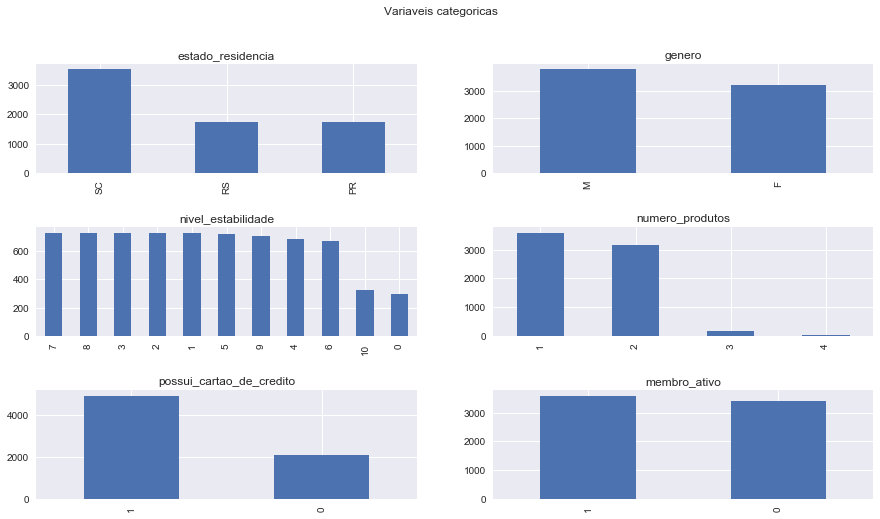

In [193]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15, 8))

fig.suptitle('Variaveis categoricas')

fig.subplots_adjust(hspace=0.5)

cols = dados.columns[dados.nunique() < 12]

for ax, feature in zip(axes.flatten(), cols):
    
    if feature:
    
        dados[feature].value_counts().plot.bar(legend = False, ax = ax, title = feature)
        

### Univariate Numerical Features

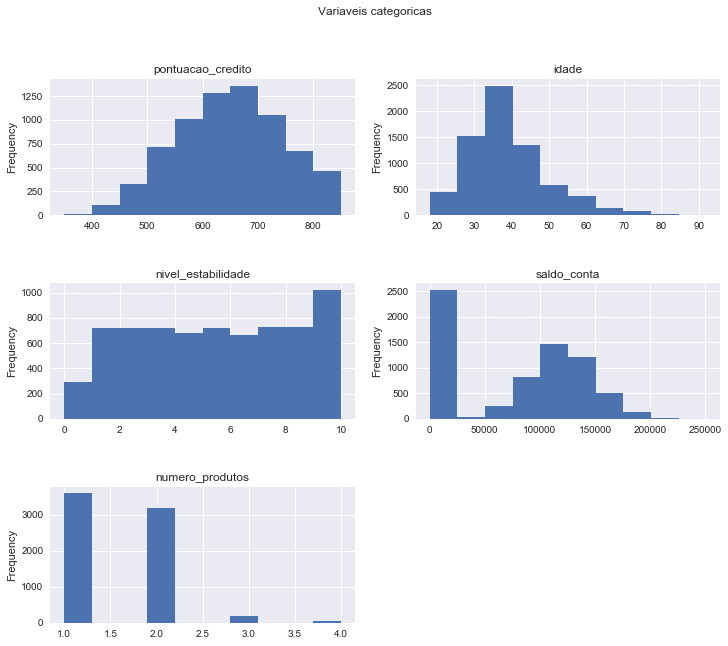

In [160]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(12, 10))

fig.suptitle('Variaveis categoricas')

fig.subplots_adjust(hspace=0.5)

cols = num.columns[(num.nunique() > 2)]

for ax, feature in zip(axes.flatten(), cols):
    
    
    num[feature].plot.hist(legend = False, ax = ax, title = feature)
    
        
if len(cols) % 2 == 1:
    
    fig.delaxes(axes.flat[-1])

### Numeric x Numeric

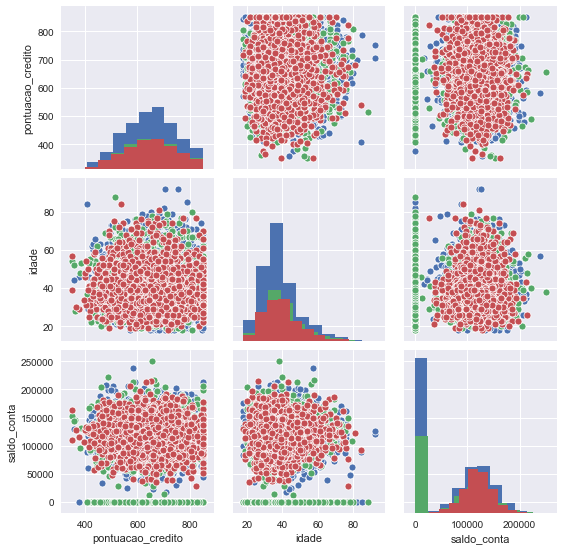

In [227]:
l = ['pontuacao_credito', 'idade', 'saldo_conta']

hue = 'estado_residencia'

l.append(hue)

g = sns.PairGrid(dados[l], hue = hue)
g = g.map_diag(plt.hist)
g = g.map_offdiag(sns.scatterplot)

### Numeric x Categoric

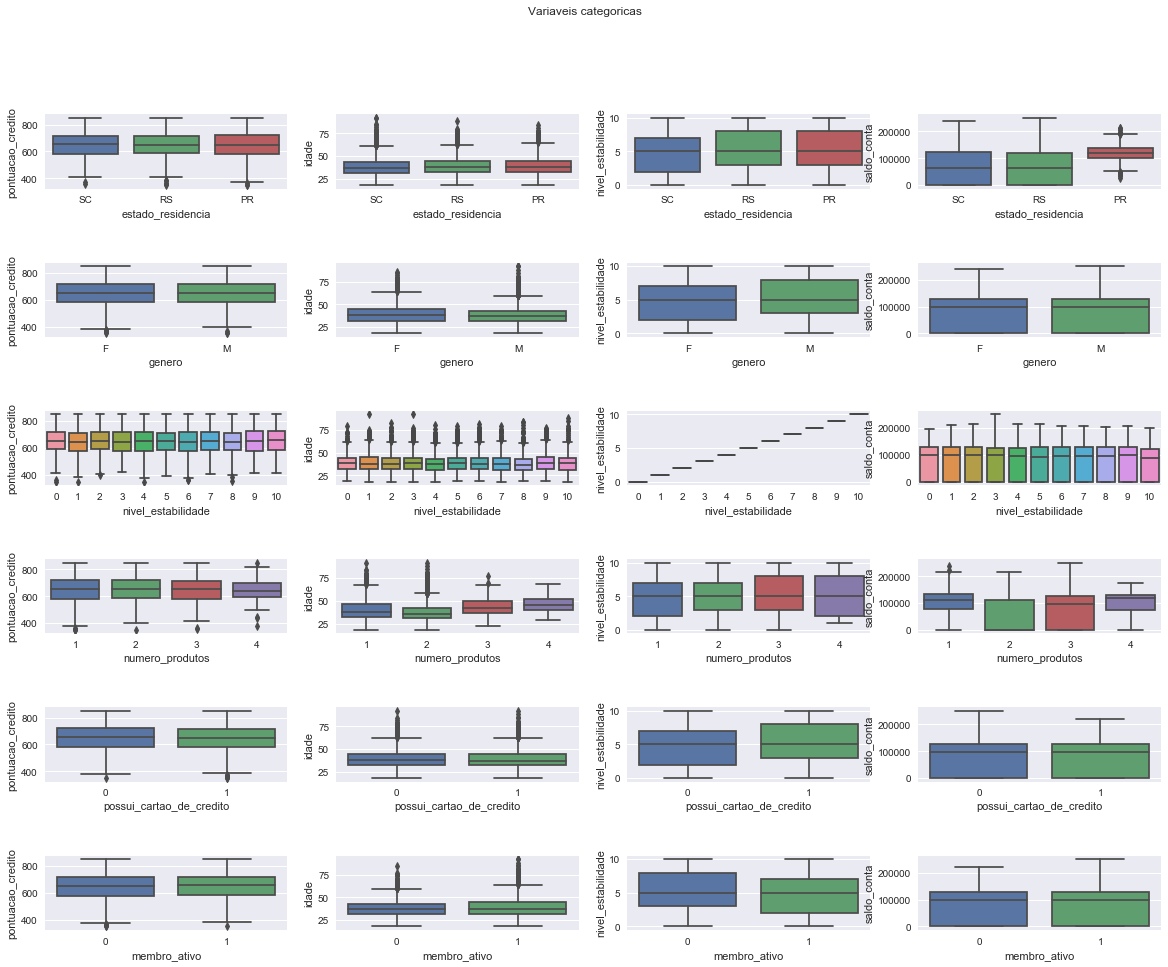

In [243]:
num_x = num.columns[(num.nunique() > 4) & (num.columns != 'numero_produtos')]

#num_x.remove('numero_produtos')

cat_y = dados.columns[dados.nunique() < 12]


fig, axes = plt.subplots(nrows=len(cat_y), ncols=len(num_x),figsize=(20, 15))

fig.suptitle('Variaveis categoricas')

fig.subplots_adjust(hspace = 1)


for n_x, x in enumerate(num_x):
    
    for n_y, y in enumerate(cat_y):
        
        sns.boxplot(y = x, x = y, data = dados, ax = axes[n_y, n_x])

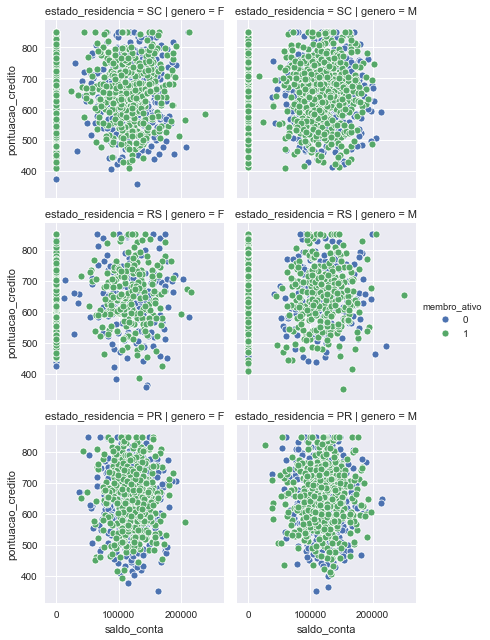

In [238]:
g = sns.FacetGrid(data = dados, row = 'estado_residencia', col = 'genero', hue = 'membro_ativo')
g.map(sns.scatterplot, 'saldo_conta', 'pontuacao_credito').add_legend()

plt.show()

### Correlation only numeric

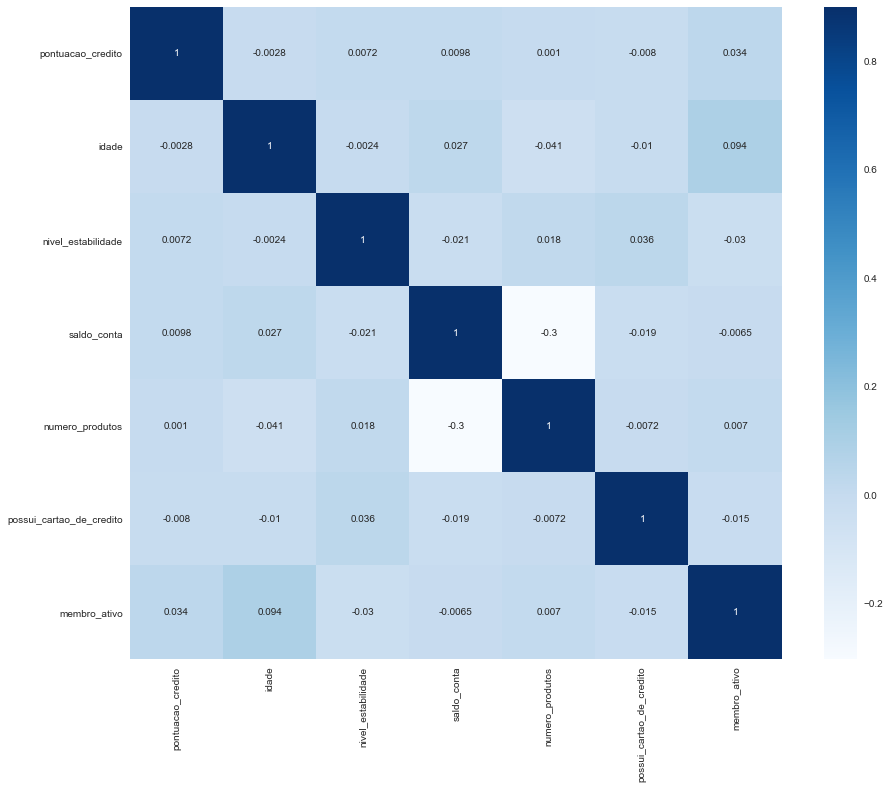

In [148]:
corr = num.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(
    corr,
    vmax=0.9,
    cmap="Blues", square=True, annot = True
)
plt.show()

In [ ]:
px.im

The correlation chart shows that there is no major correlation between numerical features being the greatest correlation the one between 'saldo_conta' and 'numero_produtos'. Taking a closer look to that correlation we can see that it is not a a linear correlation and it numero_produtos could be trated as a categorical feature with regars do "saldo_conta" and we could go even further as to bind 1 and 4 together.

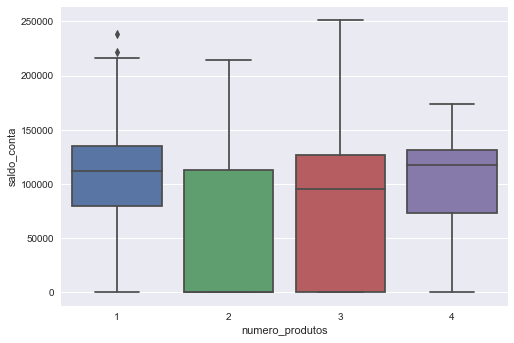

In [14]:
sns.boxplot(data = dados, y = 'saldo_conta', x = 'numero_produtos')

plt.show()

### Correlation with categorical features

In [151]:
fig = px.imshow(corr)

fig.show()

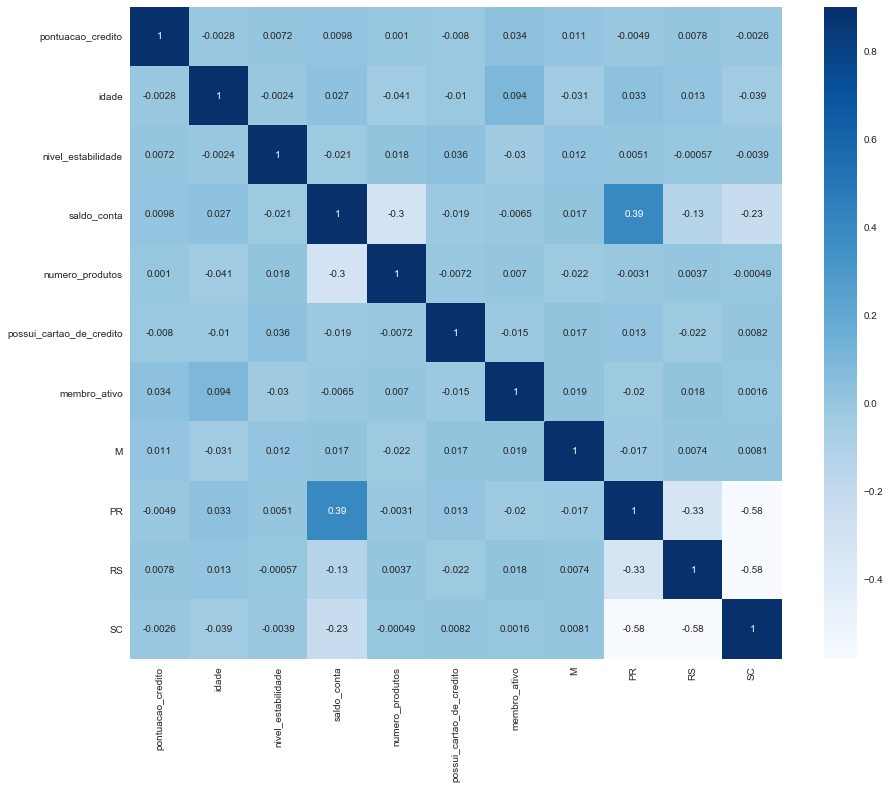

In [261]:
corr = num.join(pd.get_dummies(dados['estado_residencia'])).corr()
plt.subplots(figsize=(15,12))
sns.heatmap(
    corr,
    vmax=0.9,
    cmap="Blues", square=True, annot = True
)
plt.show()

### Linear regresssions

### "pontuacao_credito"

Performing a simple linear regression on the dataset we can see that the variables are quite randon with an R^2 close to 0, wich is expected since all features have low correlation with "pontuacao_credito"

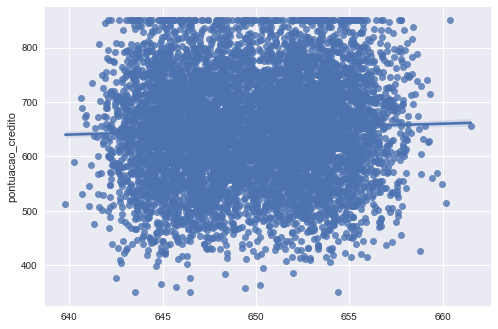

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      pontuacao_credito   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.293
Date:                Wed, 22 Apr 2020   Prob (F-statistic):              0.235
Time:                        01:49:14   Log-Likelihood:                -41953.
No. Observations:                7000   AIC:                         8.393e+04
Df Residuals:                    6990   BIC:                         8.399e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
idade                       -0.0541      0.112     -0.485      0.628      -0.273       0.165
nivel_estabilidade           0.2913      0.402      0.724      0.469      -0.497       1.080
saldo_conta               2.409e-05   2.14e-05      1.124      0.261   -1.79e-05    6.61e-05
numero_produtos              0.8626      2.109      0.409      0.682      -3.271       4.996
possui_cartao_de_credito    -1.5835      2.543     -0.623      0.533      -6.569       3.401
membro_ativo                 6.6589      2.333      2.854      0.004       2.086      11.232
M                            1.9578      2.331      0.840      0.401      -2.612       6.528
estado_residencia_PR       642.2423      7.619     84.293      0.000     627.306     657.178
estado_residencia_RS       645.4480      7.084     91.112      0.000     631.561     659.335
estado_residencia_SC       643.9801      6.851     94.004      0.000     630.551     657.409
==============================================================================
Omnibus:                      111.602   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.409
Skew:                          -0.046   Prob(JB):                     6.26e-15
Kurtosis:                       2.535   Cond. No.                     1.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
target = 'pontuacao_credito'

x = pd.get_dummies(dados.iloc[:,2:]).drop(target, axis = 1)
y = dados[target]
model = sm.OLS(y, x).fit()

sns.regplot(model.predict(x), dados[target])

plt.show()

model.summary()

### "saldo_conta"

In [27]:
target = 'saldo_conta'

x = pd.get_dummies(dados.iloc[:,2:].astype({'numero_produtos':'str'})).drop(target, axis = 1)
y = dados[target]
model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            saldo_conta   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     251.4
Date:                Sat, 25 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:10:17   Log-Likelihood:                -86055.
No. Observations:                7000   AIC:                         1.721e+05
Df Residuals:                    6988   BIC:                         1.722e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
pontuacao_credito            8.3937      6.516      1.288      0.198      -4.379      21.167
idade                     -138.7192     61.367     -2.260      0.024    -259.017     -18.421
nivel_estabilidade        -355.7243    219.127     -1.623      0.105    -785.280      73.832
possui_cartao_de_credito -3828.2781   1384.928     -2.764      0.006   -6543.157   -1113.399
membro_ativo              1217.6304   1273.318      0.956      0.339   -1278.460    3713.721
estado_residencia_PR      6.326e+04   2004.329     31.560      0.000    5.93e+04    6.72e+04
estado_residencia_RS      7785.5656   2026.681      3.842      0.000    3812.655    1.18e+04
estado_residencia_SC      7805.4854   1892.635      4.124      0.000    4095.346    1.15e+04
genero_F                  3.781e+04   2672.515     14.149      0.000    3.26e+04    4.31e+04
genero_M                  4.103e+04   2684.335     15.287      0.000    3.58e+04    4.63e+04
numero_produtos_1         4.055e+04   2206.160     18.382      0.000    3.62e+04    4.49e+04
numero_produtos_2        -4744.9528   2203.666     -2.153      0.031   -9064.807    -425.099
numero_produtos_3         1.274e+04   3695.462      3.446      0.001    5490.914       2e+04
numero_produtos_4          3.03e+04   6766.249      4.478      0.000     1.7e+04    4.36e+04
==============================================================================
Omnibus:                      369.720   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.282
Skew:                           0.356   Prob(JB):                     6.07e-56
Kurtosis:                       2.396   Cond. No.                     8.05e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.68e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Taking a closer look to the predictions we can see that they are clusters arround the feature "numero_produtos":

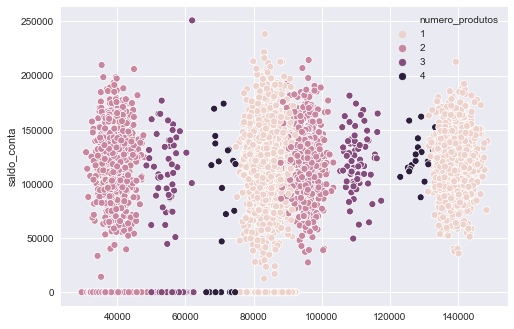

In [28]:
sns.scatterplot(model.predict(x), dados[target], hue = dados['numero_produtos'])

plt.show()

Looking to the feature "estado_residencia" and "numero_produtos" we can see that those two are the main features behind the predicitons made

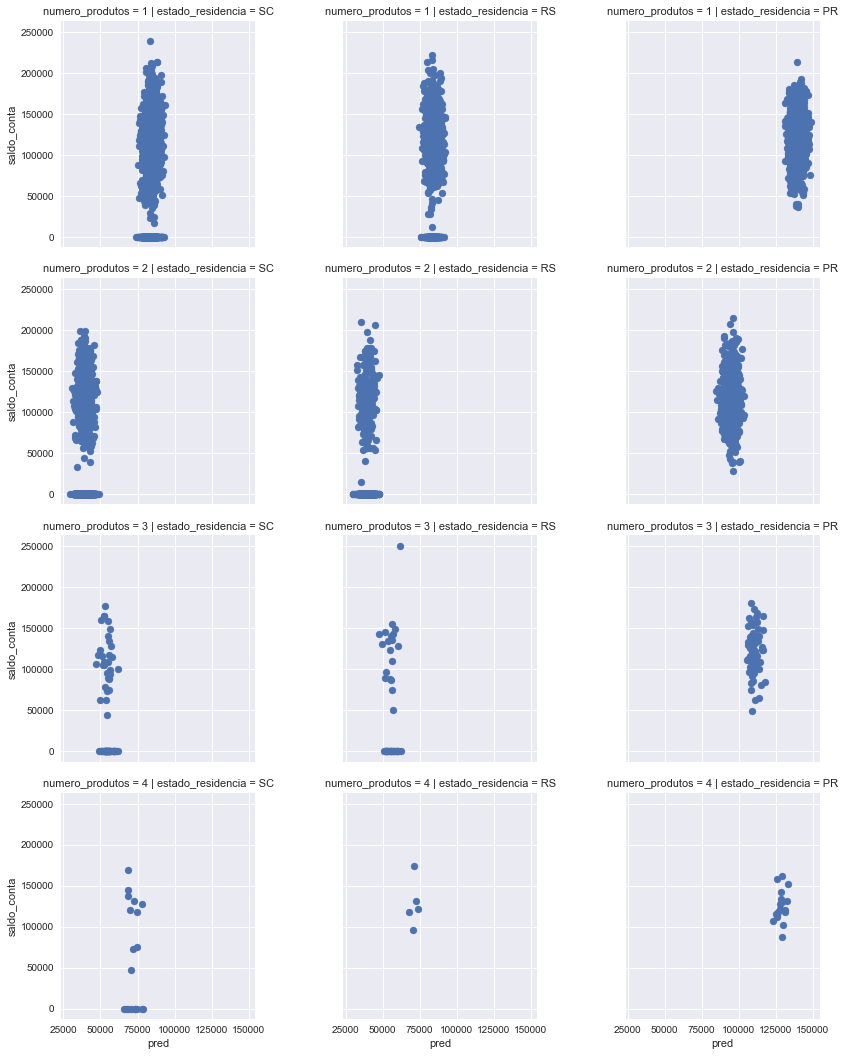

In [52]:
pred = dados.copy()

pred['pred'] = model.predict(x)

g = sns.FacetGrid(data = pred, col = 'estado_residencia', row = 'numero_produtos')
g.map(plt.scatter, 'pred', target).add_legend()

g.fig.set_size_inches(12,15)

plt.show()

Now looking only to the feateures "estado_residencia" and "numero_produtos" we can see that there is an odd thing about then. Almost all accounts with zero cash in then are in the states of SC and RS with almost no zero cash account in PR and also clientes with "numero_produtos" == 2 have a greater number of zero accounts. That second fact can lead to the hipothesis that clients are using more products because they dont have cash.

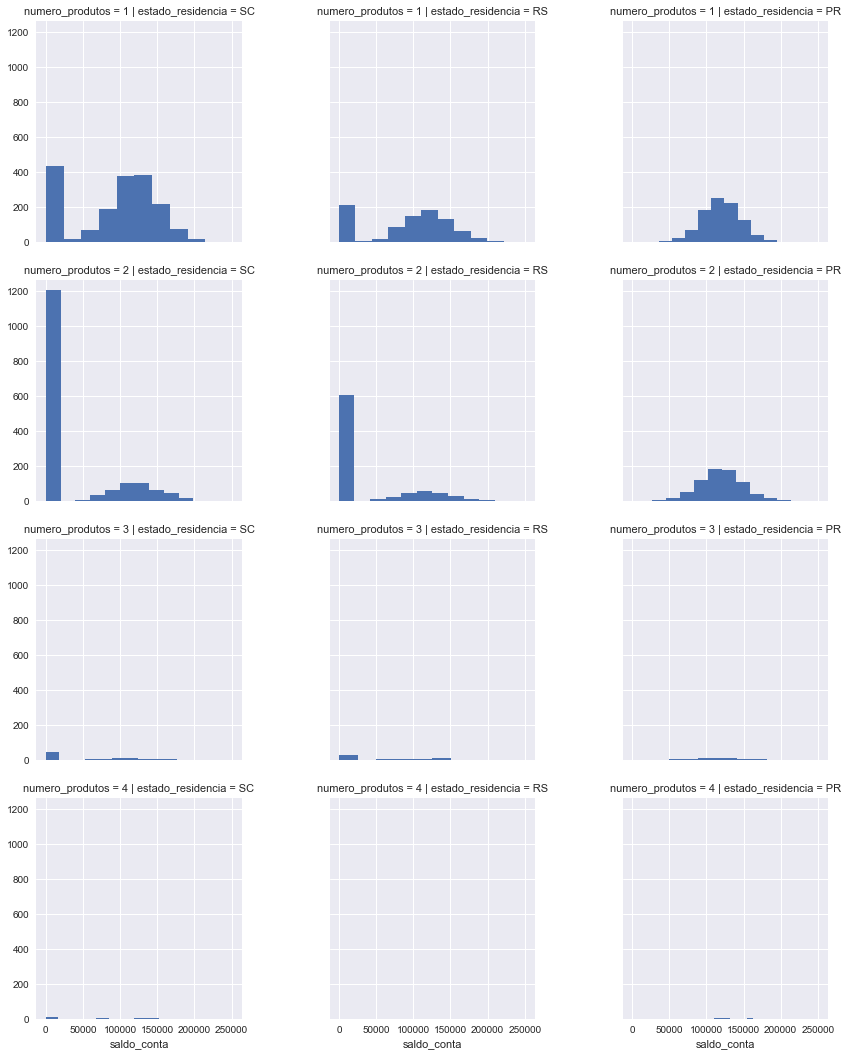

In [16]:
g = sns.FacetGrid(data = dados, col = 'estado_residencia', row = 'numero_produtos')
g.map(plt.hist, 'saldo_conta', bins = 10).add_legend()

g.fig.set_size_inches(12,15)

plt.show()

Removing the zero cash accounts from the dataset we can see that there is more regular distribution among the states

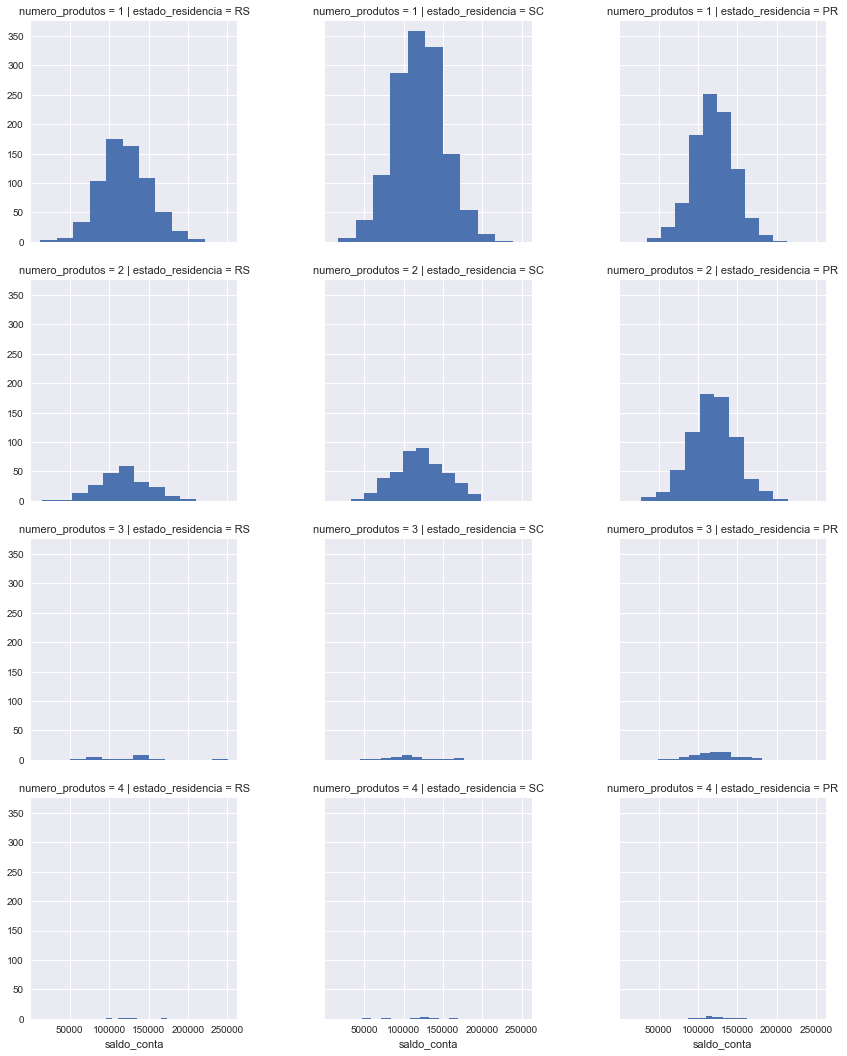

In [26]:
g = sns.FacetGrid(data = dados[dados['saldo_conta'] != 0], col = 'estado_residencia', row = 'numero_produtos')
g.map(plt.hist, 'saldo_conta', bins = 10).add_legend()

g.fig.set_size_inches(12,15)

plt.show()

Considering that the sampling of accounts with zero cash was mistekenly done and making a new regression after the removal of those we can see again that the dataset is pretty random with an R^2 of almost zero.

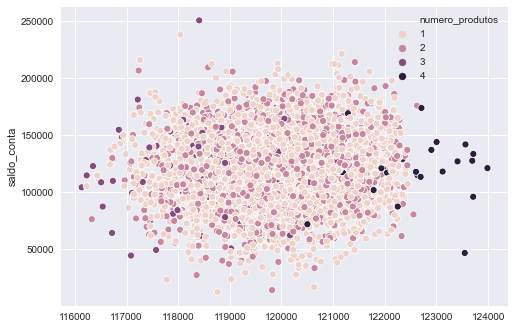

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            saldo_conta   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6037
Date:                Sat, 25 Apr 2020   Prob (F-statistic):              0.827
Time:                        18:30:14   Log-Likelihood:                -52417.
No. Observations:                4468   AIC:                         1.049e+05
Df Residuals:                    4456   BIC:                         1.049e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
pontuacao_credito            0.6968      4.624      0.151      0.880      -8.368       9.762
idade                      -20.9226     43.968     -0.476      0.634    -107.121      65.276
nivel_estabilidade         -97.9213    155.524     -0.630      0.529    -402.826     206.983
possui_cartao_de_credito   851.6990    981.845      0.867      0.386   -1073.204    2776.602
membro_ativo             -1364.5997    908.541     -1.502      0.133   -3145.791     416.591
estado_residencia_PR      3.697e+04   1362.964     27.121      0.000    3.43e+04    3.96e+04
estado_residencia_RS      3.714e+04   1467.342     25.313      0.000    3.43e+04       4e+04
estado_residencia_SC      3.777e+04   1354.956     27.872      0.000    3.51e+04    4.04e+04
genero_F                  5.532e+04   1881.712     29.398      0.000    5.16e+04     5.9e+04
genero_M                  5.656e+04   1890.757     29.912      0.000    5.28e+04    6.03e+04
numero_produtos_1          2.74e+04   1488.717     18.408      0.000    2.45e+04    3.03e+04
numero_produtos_2         2.753e+04   1545.799     17.810      0.000    2.45e+04    3.06e+04
numero_produtos_3          2.67e+04   2616.148     10.207      0.000    2.16e+04    3.18e+04
numero_produtos_4         3.024e+04   4374.344      6.912      0.000    2.17e+04    3.88e+04
==============================================================================
Omnibus:                        7.812   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                9.000
Skew:                           0.028   Prob(JB):                       0.0111
Kurtosis:                       3.213   Cond. No.                     5.04e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.62e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [53]:
target = 'saldo_conta'

slicer = dados['saldo_conta'] != 0

x = pd.get_dummies(dados.iloc[:,2:].astype({'numero_produtos':'str'})).drop(target, axis = 1)[slicer]
y = dados[target][slicer]
model = sm.OLS(y, x).fit()

sns.scatterplot(model.predict(x), dados[target], hue = dados['numero_produtos'])

plt.show()

model.summary()

In [90]:
target = 'numero_produtos'

x = pd.get_dummies(dados.iloc[:,2:]).drop(target, axis = 1)
y = dados[target].astype('int')#.values

model = sm.MNLogit(endog = y, exog = x).fit()

# sns.regplot(model.predict(x), dados[target])

# plt.show()

model.summary()

Optimization terminated successfully.
         Current function value: 0.737241
         Iterations 9


/Users/matheus/codenation/coestatistica-1/venv/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:4145: RuntimeWarning: invalid value encountered in sqrt
  bse = np.sqrt(np.diag(self.cov_params()))
/Users/matheus/codenation/coestatistica-1/venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/matheus/codenation/coestatistica-1/venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/matheus/codenation/coestatistica-1/venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:        numero_produtos   No. Observations:                 7000
Model:                        MNLogit   Df Residuals:                     6970
Method:                           MLE   Df Model:                           27
Date:                Sat, 25 Apr 2020   Pseudo R-squ.:                  0.1117
Time:                        18:48:04   Log-Likelihood:                -5160.7
converged:                       True   LL-Null:                       -5809.4
Covariance Type:            nonrobust   LLR p-value:                1.621e-256
============================================================================================
       numero_produtos=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
pontuacao_credito            0.0002      0.000      0.819      0.413      -0.000       0.001
idade                       -0.0245      0.003     -9.298      0.000      -0.030      -0.019
nivel_estabilidade           0.0055      0.009      0.600      0.548      -0.013       0.024
saldo_conta              -1.522e-05   4.98e-07    -30.549      0.000   -1.62e-05   -1.42e-05
possui_cartao_de_credito    -0.1174      0.058     -2.012      0.044      -0.232      -0.003
membro_ativo                 0.1638      0.054      3.057      0.002       0.059       0.269
estado_residencia_PR         7.9050        nan        nan        nan         nan         nan
estado_residencia_RS         7.1941        nan        nan        nan         nan         nan
estado_residencia_SC         7.1643        nan        nan        nan         nan         nan
genero_F                    -5.6103        nan        nan        nan         nan         nan
genero_M                    -5.5440        nan        nan        nan         nan         nan
--------------------------------------------------------------------------------------------
       numero_produtos=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
pontuacao_credito        -6.378e-05      0.001     -0.083      0.934      -0.002       0.001
idade                        0.0295      0.006      4.646      0.000       0.017       0.042
nivel_estabilidade           0.0211      0.026      0.818      0.414      -0.030       0.072
saldo_conta              -9.346e-06   1.46e-06     -6.397      0.000   -1.22e-05   -6.48e-06
possui_cartao_de_credito     0.0359      0.167      0.215      0.830      -0.292       0.364
membro_ativo                -0.4147      0.155     -2.672      0.008      -0.719      -0.111
estado_residencia_PR       -37.7788        nan        nan        nan         nan         nan
estado_residencia_RS       -38.5678        nan        nan        nan         nan         nan
estado_residencia_SC       -38.7276        nan        nan        nan         nan         nan
genero_F                    35.3707        nan        nan        nan         nan         nan
genero_M                    34.8732        nan        nan        nan         nan         nan
--------------------------------------------------------------------------------------------
       numero_produtos=4       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
pontuacao_credito           -0.0006      0.002     -0.395      0.693      -0.004       0.002
idade                        0.0425      0.012      3.462      0.001       0.018       0.067
nivel_estabilidade           0.0261      0.053      0.489      0.625      -0.078       0.131
saldo_conta               -2.51e-06   3.08e-06     -0.815      0.415   -8.55e-0

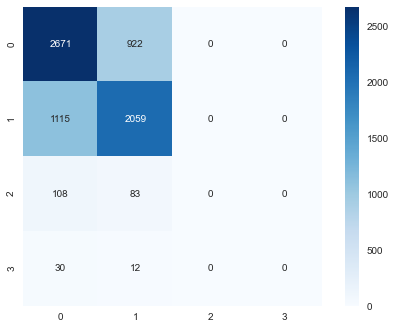

In [119]:
pred = model.predict(x).values.argmax(axis = 1)+1

sns.heatmap(confusion_matrix(dados[target].astype('int'), pred),
           cmap="Blues", square=True, annot = True, fmt='g')

In [61]:
kmeans = KMeans(n_clusters = 5, random_state = 0).fit(
    StandardScaler().fit_transform(pd.get_dummies(dados.iloc[:,2:]))
)

In [62]:
pca = PCA(n_components = 5)

In [63]:
p = pca.fit_transform(X = StandardScaler().fit_transform(num))

In [64]:
pca.explained_variance_ratio_.cumsum()

array([0.18773742, 0.34555642, 0.49231632, 0.63567213, 0.77358433])

In [65]:
pca.components_

array([[-0.02027235, -0.1615271 ,  0.09416928, -0.69303637,  0.69376584,
         0.04492152, -0.03165081],
       [ 0.20354985,  0.57586149, -0.24110782, -0.10765708,  0.11259932,
        -0.24033977,  0.69770062],
       [ 0.14866358,  0.30834962,  0.65983574, -0.00804795, -0.05601532,
         0.64683018,  0.16076282],
       [-0.92109719,  0.32024753, -0.11994583, -0.05676652, -0.0034983 ,
         0.17651528,  0.01556159],
       [-0.15030851,  0.20825845,  0.65495902,  0.0263959 ,  0.02020432,
        -0.69584081, -0.14058826]])

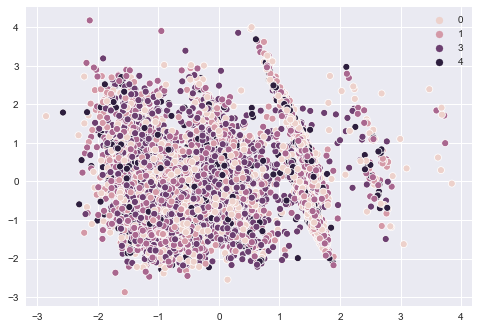

In [66]:
sns.scatterplot(x = p[:,0], y = p[:,1], hue = kmeans.labels_)
plt.show()

In [ ]:
# Comment things
# Hypothesis Testing
# Dendogram cluster
# Forecast on products 